Installer seaborn, si il pas déjà présent:

`python -m pip install seaborn`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import de la DataFrame :

In [2]:
df_final = pd.read_csv(
    'Data/outputs/extract_df_final.csv', sep=';', encoding='utf-8-sig'
)
# df_final.info()

In [3]:
df_final = df_final.astype(
    {
        'OverallStatus': 'category',
        'StudyType': 'category', 
        'type': 'category',
    }
)
df_final = df_final.astype(
    {
        'StudyFirstPostDate': 'datetime64[ns]',
        'StartDate': 'datetime64[ns]',
        'CompletionDate': 'datetime64[ns]',
    }
)
df_final = df_final.convert_dtypes()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   NCTId               498 non-null    string        
 1   BriefTitle          498 non-null    string        
 2   LeadSponsorName     498 non-null    string        
 3   CollaboratorName    224 non-null    string        
 4   OverallStatus       498 non-null    category      
 5   StudyType           498 non-null    category      
 6   HasResults          498 non-null    boolean       
 7   StudyFirstPostDate  498 non-null    datetime64[ns]
 8   StartDate           498 non-null    datetime64[ns]
 9   CompletionDate      498 non-null    datetime64[ns]
 10  pmid                392 non-null    Int64         
 11  type                392 non-null    category      
 12  title               392 non-null    string        
 13  authors             392 non-null    string        

In [4]:
df_final

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
0,NCT02081066,Identification of CETP as a Marker of Atherosc...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2014-03-07,2014-09-25,2020-09-01,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
1,NCT05199831,Situational Analysis of HIV-related Disability...,"Programme PAC-CI, Site ANRS-MIE de Côte d'Ivoire","Institute of Research for Development, France ...",COMPLETED,OBSERVATIONAL,False,2022-01-20,2021-02-05,2022-08-10,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
2,NCT01895920,Viral Biofilms: Hijacking T Cell Extracellular...,"ANRS, Emerging Infectious Diseases",<NA>,COMPLETED,INTERVENTIONAL,False,2013-07-11,2013-01-01,2018-02-01,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
3,NCT02116374,Physiopathology Study of the Microbiota Biodiv...,"ANRS, Emerging Infectious Diseases",<NA>,COMPLETED,OBSERVATIONAL,False,2014-04-16,2014-12-01,2016-06-01,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,NCT02107365,"Therapy With Asunaprevir, Daclatasvir, Ribavir...","ANRS, Emerging Infectious Diseases",Bristol-Myers Squibb,COMPLETED,INTERVENTIONAL,False,2014-04-08,2013-11-01,2015-04-01,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,NCT02052271,Experimental Therapeutics in Essential Tremor ...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2014-02-03,2014-06-03,2018-03-27,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
494,NCT00918307,Efficacy and Safety of Varenicline Among HIV-i...,"ANRS, Emerging Infectious Diseases",Pfizer,COMPLETED,INTERVENTIONAL,False,2009-06-11,2009-10-01,2014-07-01,34611902,DERIVED,Interventions for preventing weight gain after...,Hartmann-Boyce J; Theodoulou A; Farley A; Haje...,10.1002/14651858.CD006219.pub4,2021,"['Journal Article', 'Meta-Analysis', ""Research..."
495,NCT00918307,Efficacy and Safety of Varenicline Among HIV-i...,"ANRS, Emerging Infectious Diseases",Pfizer,COMPLETED,INTERVENTIONAL,False,2009-06-11,2009-10-01,2014-07-01,29329763,DERIVED,Efficacy and safety of varenicline for smoking...,Mercié P; Arsandaux J; Katlama C; Ferret S; Be...,10.1016/S2352-3018(18)30002-X,2018,"['Clinical Trial, Phase III', 'Journal Article..."
496,NCT01698411,Study of the Influence of Sleep on Hemodynamic...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2012-10-03,2012-10-01,2015-02-01,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


## Vérification des sponsors:

In [5]:
df_final.drop_duplicates(subset='NCTId').loc[:, 'LeadSponsorName'].value_counts()

LeadSponsorName
Institut National de la Santé Et de la Recherche Médicale, France    112
ANRS, Emerging Infectious Diseases                                    77
French National Agency for Research on AIDS and Viral Hepatitis        8
Paris Cardiovascular Research Center (Inserm U970)                     2
Programme PAC-CI, Site ANRS-MIE de Côte d'Ivoire                       1
Name: count, dtype: Int64

## Vérification des dates :

#### StudyFirstPostDate :

In [6]:
df_final.drop_duplicates(subset='NCTId').loc[:, 'StudyFirstPostDate'].notna().value_counts()

StudyFirstPostDate
True    200
Name: count, dtype: int64

#### StartDate :

In [7]:
df_final.drop_duplicates(subset='NCTId').loc[:, 'StartDate'].notna().value_counts()

StartDate
True    200
Name: count, dtype: int64

#### CompletionDate :

In [8]:
df_final.drop_duplicates(subset='NCTId').loc[:, 'CompletionDate'].notna().value_counts()

CompletionDate
True    200
Name: count, dtype: int64

#### Nombre d'études dont la date de fin est après 2013 :

In [9]:
# mask_ge_2013 = df_final.loc[:, 'CompletionDate'].dt.year >= 2013
(df_final.drop_duplicates(subset='NCTId').loc[:, 'CompletionDate'].dt.year >= 2013).value_counts()

CompletionDate
True    200
Name: count, dtype: int64

## Publications par type et par année:

Nombre de publications par année:

In [10]:
publications_per_year_pivot_table = pd.pivot_table(
    df_final,
    index='year',
    columns='type',
    aggfunc='size',
    fill_value=0,
    observed=False,
)
publications_per_year_pivot_table

type,BACKGROUND,DERIVED,PUBMED,RESULT
year,,,,
1980,0,0,0,1
1990,0,0,0,1
1991,1,0,0,0
1994,1,0,0,0
1999,1,0,0,0
2000,1,0,0,0
2002,1,0,0,0
2003,0,0,0,1
2004,0,0,0,4


On complète l'index :

In [11]:
# We fill the years with no publications with the value 0, so they are not missing from the plot
publications_per_year_pivot_table = publications_per_year_pivot_table.reindex(
    range(
        publications_per_year_pivot_table.index[0],
        publications_per_year_pivot_table.index[-1] + 1,
    ),
    fill_value=0,
)

Génération du graphique :

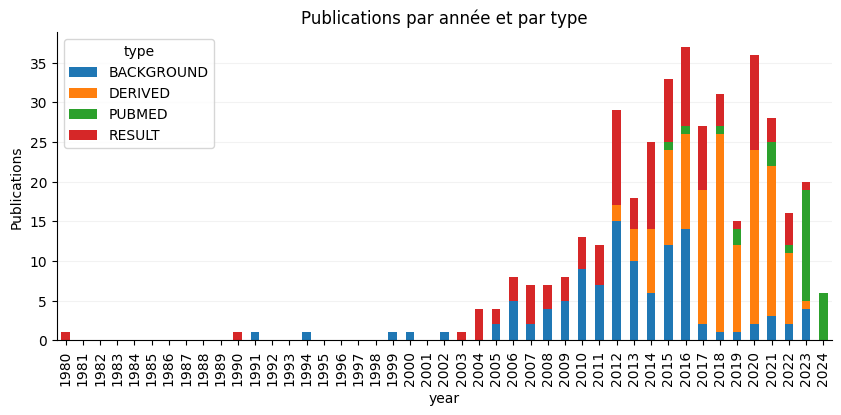

In [12]:
ax = publications_per_year_pivot_table.plot(
    kind='bar',
    title='Publications par année et par type',
    ylabel='Publications',
    figsize=(10, 4),
    stacked=True,
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', color='0.95')
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelrotation=90)

On remarque deux valeurs extrêmes qui sont classées comme **'RESULT'** :

In [13]:
mask = df_final.loc[:, 'year'] <= 1990

In [14]:
df_final.loc[mask]

,NCTId,BriefTitle,LeadSponsorName,CollaboratorName,OverallStatus,StudyType,HasResults,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,authors,doi,year,publication_types
200,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,INTERVENTIONAL,False,2011-09-13,2011-09-01,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,Blin O; Masson G; Azulay JP; Fondarai J; Serra...,10.1111/j.1365-2125.1990.tb03848.x,1990,"['Clinical Trial', 'Comparative Study', 'Journ..."
249,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,Institut National de la Santé Et de la Recherc...,<NA>,COMPLETED,OBSERVATIONAL,False,2015-07-02,2015-10-07,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,Wurtz RH; Albano JE,10.1146/annurev.ne.03.030180.001201,1980,"['Comparative Study', 'Journal Article', 'Revi..."


Pour chacune de ces études, toutes leurs publications sont classées comme **'RESULT'**:

In [15]:
nctids = df_final.loc[mask, 'NCTId']

In [16]:
mask_0 = df_final.loc[:, 'NCTId'] == nctids.iloc[0]
columns_to_display = [
    'NCTId',
    'BriefTitle',
    'StudyFirstPostDate',
    'StartDate',
    'CompletionDate',
    'pmid',
    'type',
    'title',
    'doi',
    'year',
]

df_final.loc[mask_0, columns_to_display]

,NCTId,BriefTitle,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,doi,year
197,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2011-09-13,2011-09-01,2014-12-01,12914551,RESULT,Pharmacokinetic-pharmacodynamic study of apomo...,10.1046/j.1472-8206.2003.00152.x,2003
198,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2011-09-13,2011-09-01,2014-12-01,15037514,RESULT,Effect of acute and chronic lamotrigine on bas...,10.1038/sj.bjp.0705737,2004
199,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2011-09-13,2011-09-01,2014-12-01,15249613,RESULT,PET evidence for a role of the basal ganglia i...,10.1212/01.wnl.0000132840.40838.13,2004
200,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2011-09-13,2011-09-01,2014-12-01,2271377,RESULT,Apomorphine-induced blinking and yawning in he...,10.1111/j.1365-2125.1990.tb03848.x,1990
201,NCT01432821,Blinking and Yawning in Epilepsy: The Role of ...,2011-09-13,2011-09-01,2014-12-01,15777732,RESULT,"Lamotrigine, carbamazepine and phenytoin diffe...",10.1016/j.eplepsyres.2005.02.002,2005


In [17]:
mask_1 = df_final.loc[:, 'NCTId'] == nctids.iloc[1]

df_final.loc[mask_1, columns_to_display]

,NCTId,BriefTitle,StudyFirstPostDate,StartDate,CompletionDate,pmid,type,title,doi,year
248,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2015-07-02,2015-10-07,2018-01-19,23916713,RESULT,Enhanced visual responses in the superior coll...,10.1016/j.neuroscience.2013.07.047,2013
249,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2015-07-02,2015-10-07,2018-01-19,6774653,RESULT,Visual-motor function of the primate superior ...,10.1146/annurev.ne.03.030180.001201,1980
250,NCT02488395,Superior Colliculus Activity in Parkinson Dise...,2015-07-02,2015-10-07,2018-01-19,22639796,RESULT,Linking visual response properties in the supe...,10.1111/j.1460-9568.2012.08079.x,2012


**Certaine etudes cliniques classent toutes les publications associées comme 'RESULT', on ne peut donc pas se fier a cette valeur**

Publications de type 'RESULT' dont la date de publication est antérieur à la début de l'essai clinique :

In [18]:
mask_1 = df_final.loc[:, 'type'] == 'RESULT'
mask_2 = df_final.loc[:, 'year'] < df_final.loc[:, 'StartDate'].dt.year

df_final.loc[mask_1 & mask_2, ['NCTId', 'type', 'StartDate', 'year']]

,NCTId,type,StartDate,year
124,NCT01490489,RESULT,2011-07-11,2009
125,NCT01490489,RESULT,2011-07-11,2006
126,NCT01490489,RESULT,2011-07-11,2007
197,NCT01432821,RESULT,2011-09-01,2003
198,NCT01432821,RESULT,2011-09-01,2004
199,NCT01432821,RESULT,2011-09-01,2004
200,NCT01432821,RESULT,2011-09-01,1990
201,NCT01432821,RESULT,2011-09-01,2005
248,NCT02488395,RESULT,2015-10-07,2013
249,NCT02488395,RESULT,2015-10-07,1980


**Les transformer en 'BACKGROUND' ?**

In [19]:
len(df_final.loc[mask_1 & mask_2])

13

In [20]:
nctids = df_final.loc[mask_1 & mask_2].loc[:, 'NCTId'].unique()
nctids

<StringArray>
['NCT01490489', 'NCT01432821', 'NCT02488395', 'NCT00136630']
Length: 4, dtype: string

In [21]:
df_final.loc[df_final.loc[:, 'NCTId'].isin(nctids), ['NCTId', 'type']]

,NCTId,type
124,NCT01490489,RESULT
125,NCT01490489,RESULT
126,NCT01490489,RESULT
197,NCT01432821,RESULT
198,NCT01432821,RESULT
199,NCT01432821,RESULT
200,NCT01432821,RESULT
201,NCT01432821,RESULT
248,NCT02488395,RESULT
249,NCT02488395,RESULT


On trouve d'avantage d'études dont toutes leurs publications sont classées comme **'RESULT'**

Les etudes dont toutes les publications sont de type 'RESULT' :

In [22]:
nctids = df_final.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_final.loc[:, 'NCTId'] == nctid
    if (df_final.loc[mask, 'type'] == 'RESULT').all():
        res.append(nctid)
res

['NCT03235258',
 'NCT04470648',
 'NCT01882062',
 'NCT01490489',
 'NCT01432821',
 'NCT02488395',
 'NCT02916732']

In [23]:
len(res)

7

In [24]:
df_final.loc[df_final.loc[:, 'NCTId'].isin(res), ['NCTId', 'type']].head(10)

,NCTId,type
9,NCT03235258,RESULT
10,NCT03235258,RESULT
11,NCT03235258,RESULT
12,NCT03235258,RESULT
13,NCT03235258,RESULT
14,NCT03235258,RESULT
15,NCT03235258,RESULT
16,NCT03235258,RESULT
17,NCT03235258,RESULT
18,NCT03235258,RESULT


### Champ 'HasResults':

Etudes dont le champ 'HasResults' est True:

In [25]:
df_final.loc[df_final.loc[:, 'HasResults'], 'NCTId'].unique()

<StringArray>
['NCT02453048', 'NCT02573948', 'NCT01882062', 'NCT02212379', 'NCT01605890',
 'NCT00928187']
Length: 6, dtype: string

In [26]:
df_final.loc[df_final.loc[:, 'HasResults'], ['NCTId', 'HasResults', 'type']]

,NCTId,HasResults,type
22,NCT02453048,True,BACKGROUND
23,NCT02453048,True,BACKGROUND
24,NCT02453048,True,DERIVED
25,NCT02453048,True,BACKGROUND
26,NCT02453048,True,BACKGROUND
27,NCT02453048,True,BACKGROUND
28,NCT02453048,True,BACKGROUND
29,NCT02453048,True,BACKGROUND
30,NCT02453048,True,BACKGROUND
31,NCT02453048,True,BACKGROUND


In [27]:
nb_studies = len(df_final.loc[:, 'NCTId'].unique())
nb_studies_has_result = len(
    df_final.loc[df_final.loc[:, 'HasResults'], 'NCTId'].unique()
)
print("Nombre d'etudes dont le champ 'HasResults' est True:")
print(f'{nb_studies_has_result}/{nb_studies}')

Nombre d'etudes dont le champ 'HasResults' est True:
6/200


**Le nombre très faible d'études qui renseignent le champ 'HasResults', fait que l'on peut difficilement exploiter cette donnée**.

Mais quand le champs est renseigné, on a affaire à des études de qualité, où l'on peut généralement se fier aux types de publication indiqué.

### Publications par année et par type : 

In [28]:
df_year_type = df_final.loc[:, ['year', 'type']].dropna()
df_year_type

,year,type
5,2021,DERIVED
7,2021,DERIVED
9,2011,RESULT
10,2014,RESULT
11,2014,RESULT
...,...,...
490,2021,DERIVED
491,2023,PUBMED
492,2019,DERIVED
494,2021,DERIVED


In [29]:
min_year = df_year_type.loc[:, 'year'].min()
max_year = df_year_type.loc[:, 'year'].max()

In [30]:
palette = {'BACKGROUND': 'C0', 'DERIVED': 'C1', 'PUBMED': 'C3', 'RESULT': 'C2'}

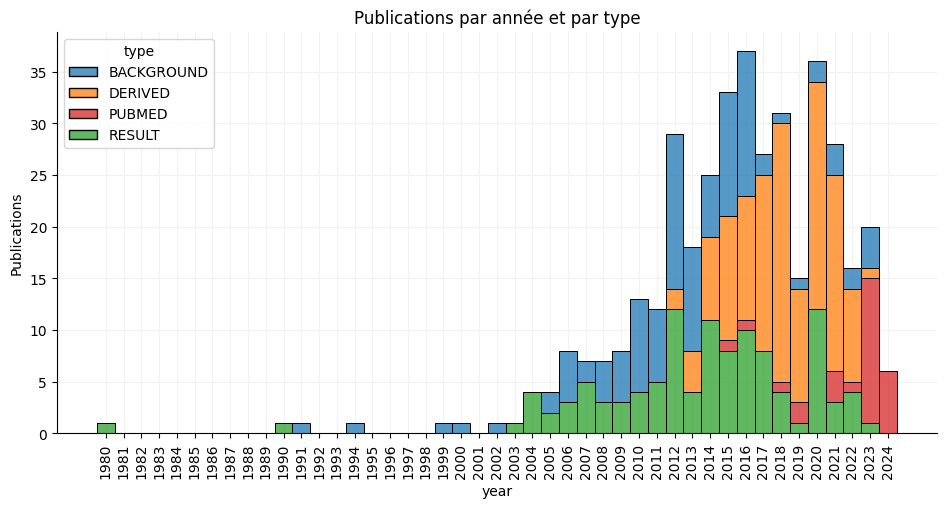

In [31]:
g = sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# x axis ticks
g.set_xticks(range(min_year, max_year + 1))
g.tick_params(axis='x', labelrotation=90)

# Grid
g.grid(color='0.95')
g.set_axisbelow(True)

# Figure size
plt.tight_layout()
g.figure.set_figwidth(10)
g.figure.set_figheight(5)

# Title
g.set(title='Publications par année et par type', ylabel='Publications')

# Remove spines
sns.despine()

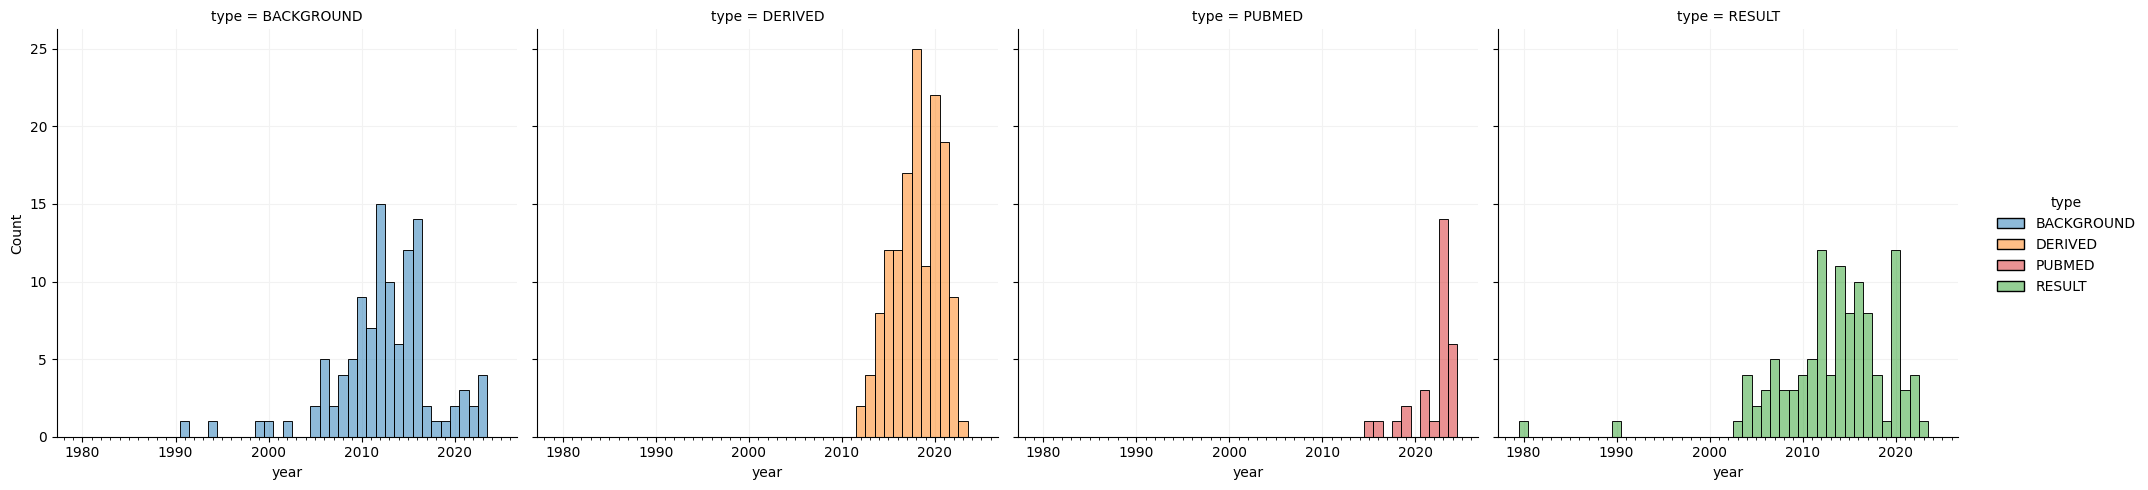

In [32]:
from matplotlib.ticker import AutoMinorLocator

g = sns.displot(
    data=df_year_type,
    x='year',
    hue='type',
    kind='hist',
    col='type',
    discrete=True,
    palette=palette,
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

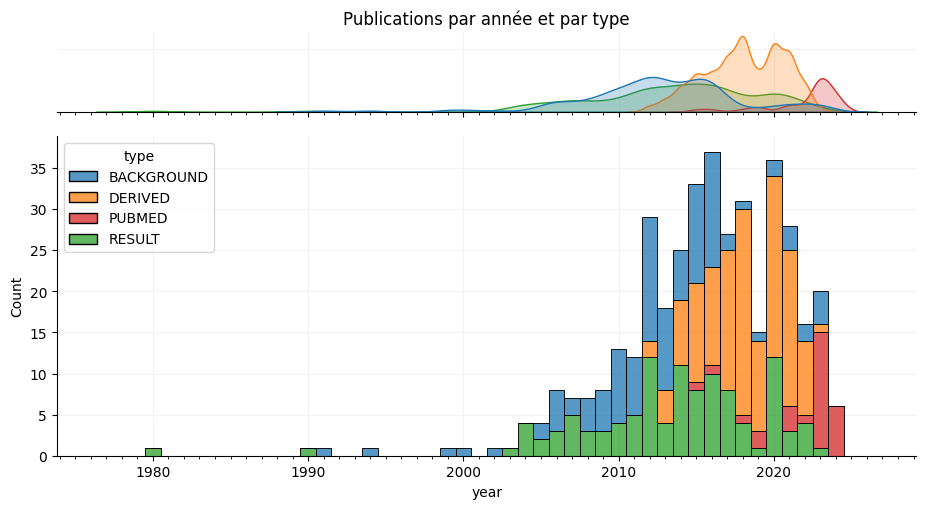

In [33]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=df_year_type,
    x='year',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=df_year_type,
    x='year',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title='Publications par année et par type', ylabel='')

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

### Délai entre la publication et la fin de l'étude :

In [34]:
df_final.loc[:, ['NCTId', 'type', 'CompletionDate', 'year']]

,NCTId,type,CompletionDate,year
0,NCT02081066,NaN,2020-09-01,<NA>
1,NCT05199831,NaN,2022-08-10,<NA>
2,NCT01895920,NaN,2018-02-01,<NA>
3,NCT02116374,NaN,2016-06-01,<NA>
4,NCT02107365,NaN,2015-04-01,<NA>
...,...,...,...,...
493,NCT02052271,NaN,2018-03-27,<NA>
494,NCT00918307,DERIVED,2014-07-01,2021
495,NCT00918307,DERIVED,2014-07-01,2018
496,NCT01698411,NaN,2015-02-01,<NA>


In [35]:
time_completion_publication = df_final.loc[:, 'year'] - df_final.loc[:, 'CompletionDate'].dt.year.astype('Int64')
time_completion_publication = time_completion_publication.rename('TimeCompletionPublication')
time_completion_publication = df_final.loc[:, ['NCTId', 'type', 'CompletionDate', 'year']].join(time_completion_publication)
time_completion_publication

,NCTId,type,CompletionDate,year,TimeCompletionPublication
0,NCT02081066,NaN,2020-09-01,<NA>,<NA>
1,NCT05199831,NaN,2022-08-10,<NA>,<NA>
2,NCT01895920,NaN,2018-02-01,<NA>,<NA>
3,NCT02116374,NaN,2016-06-01,<NA>,<NA>
4,NCT02107365,NaN,2015-04-01,<NA>,<NA>
...,...,...,...,...,...
493,NCT02052271,NaN,2018-03-27,<NA>,<NA>
494,NCT00918307,DERIVED,2014-07-01,2021,7
495,NCT00918307,DERIVED,2014-07-01,2018,4
496,NCT01698411,NaN,2015-02-01,<NA>,<NA>


In [36]:
# min_time = time_completion_publication.loc[:, 'TimeCompletionPublication'].min()
# max_time = time_completion_publication.loc[:, 'TimeCompletionPublication'].max()

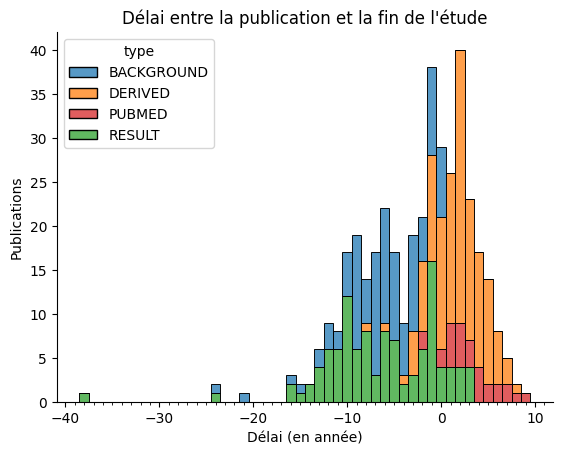

In [37]:
g = sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude",
    xlabel='Délai (en année)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

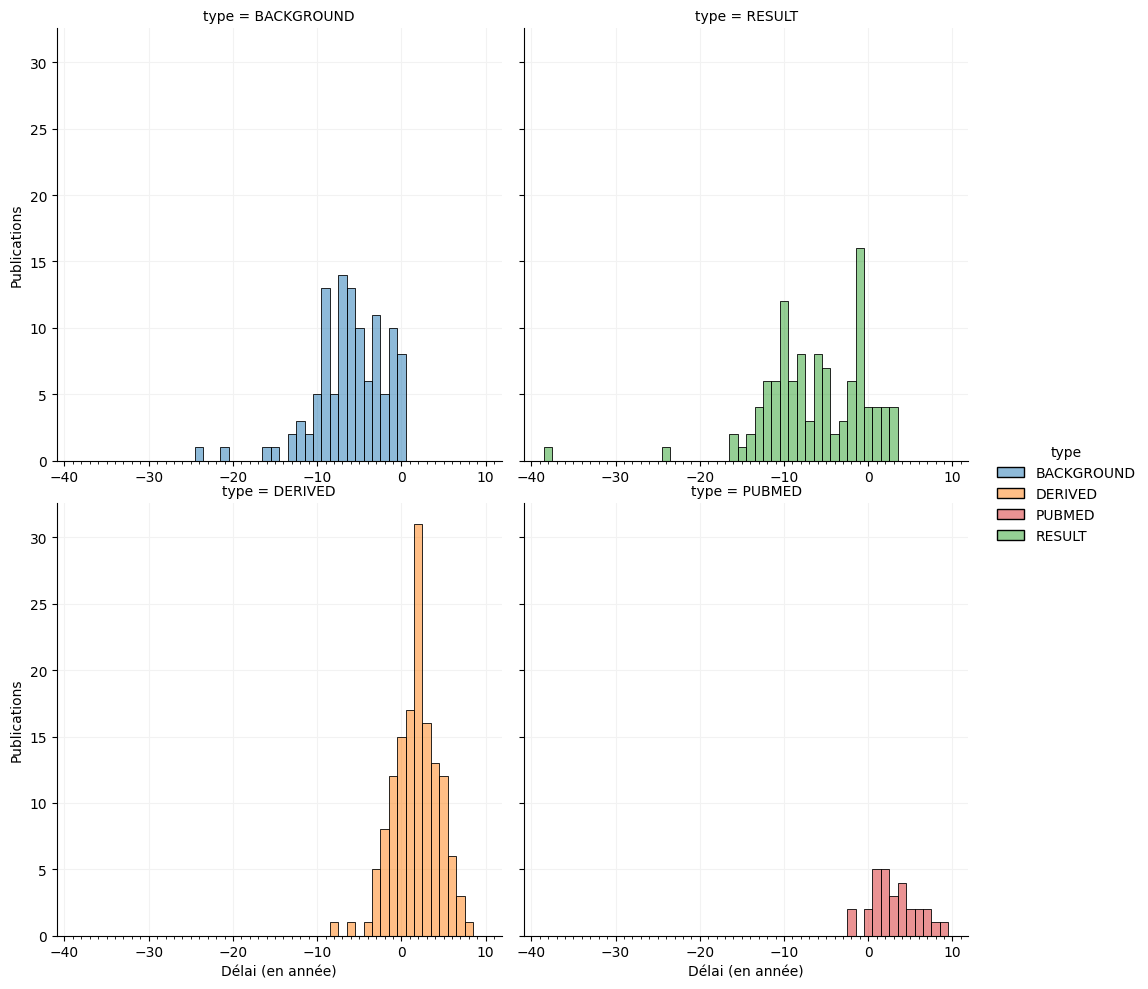

In [38]:
g = sns.displot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT', 'DERIVED', 'PUBMED'],
    col_wrap=2,
    discrete=True,
    kind='hist',
    palette=palette,
)

g.tick_params(labelbottom=True)
g.set_axis_labels('Délai (en année)', 'Publications')

for ax in g.axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

**Problablement des publications de type 'RESULT' parmis les 'DERIVED'**

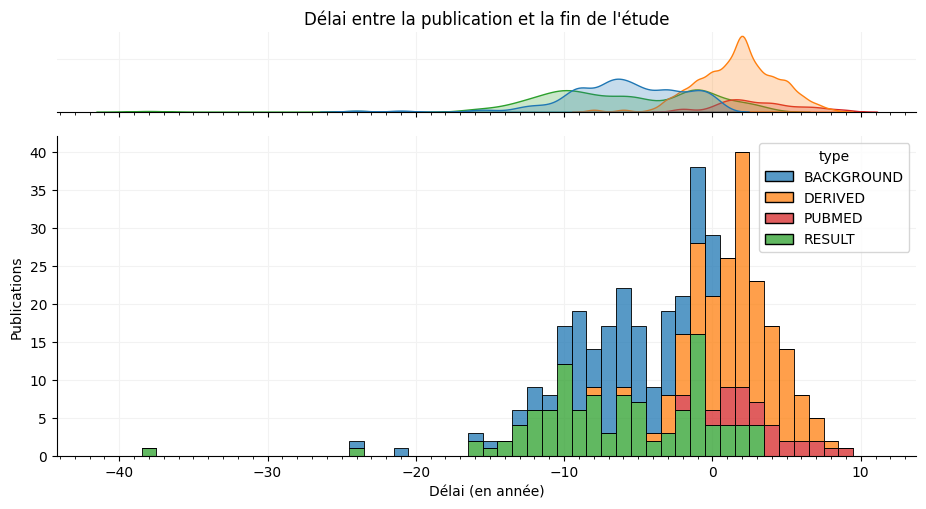

In [39]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_completion_publication,
    x='TimeCompletionPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et la fin de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en année)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

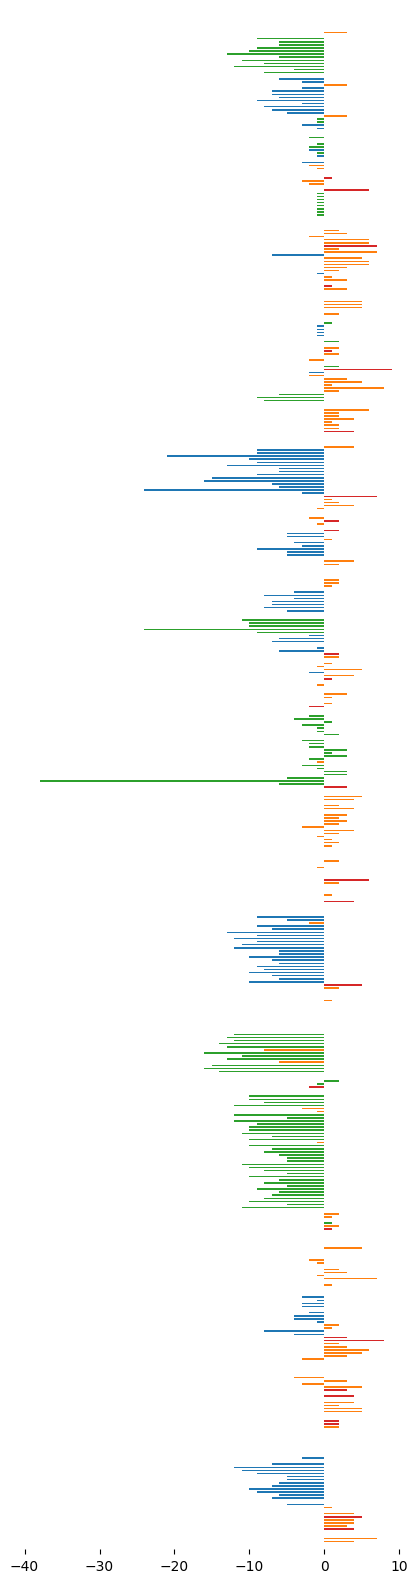

In [40]:
for type in ['BACKGROUND', 'DERIVED', 'PUBMED', 'RESULT']:
    mask_type = time_completion_publication.loc[:, 'type'] == type
    df_type = time_completion_publication.loc[mask_type, 'TimeCompletionPublication']
    df_type = df_type.reindex(time_completion_publication.index)

    axs = df_type.plot.barh(
        # x=time_completion_publication.index,
        y='TimeCompletionPublication',
        figsize=(5, 20),
        color=palette[type],
    )

axs.invert_yaxis()
axs.yaxis.set_visible(False)
axs.set_frame_on(False)

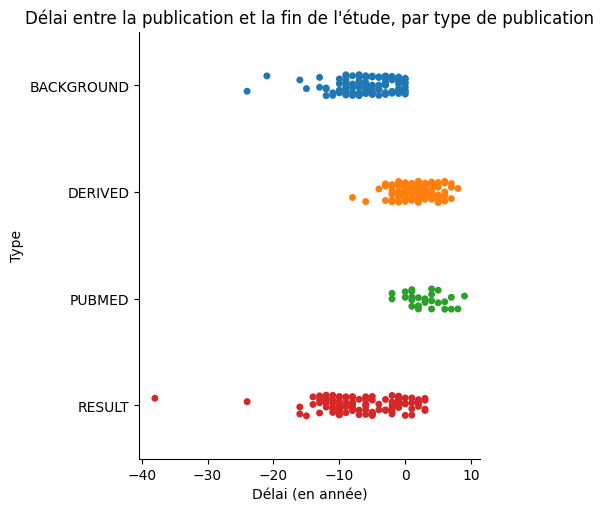

In [41]:
g = sns.catplot(
    data=time_completion_publication.dropna(),
    x='TimeCompletionPublication',
    y='type',
    hue='type',
    jitter=True,
)

# Title
g.set(
    title="Délai entre la publication et la fin de l'étude, par type de publication",
    xlabel='Délai (en année)',
    ylabel='Type',
)

### Délai entre la publication et le début de l'étude :

In [42]:
df_final.loc[:, ['NCTId', 'type', 'StartDate', 'year']]

,NCTId,type,StartDate,year
0,NCT02081066,NaN,2014-09-25,<NA>
1,NCT05199831,NaN,2021-02-05,<NA>
2,NCT01895920,NaN,2013-01-01,<NA>
3,NCT02116374,NaN,2014-12-01,<NA>
4,NCT02107365,NaN,2013-11-01,<NA>
...,...,...,...,...
493,NCT02052271,NaN,2014-06-03,<NA>
494,NCT00918307,DERIVED,2009-10-01,2021
495,NCT00918307,DERIVED,2009-10-01,2018
496,NCT01698411,NaN,2012-10-01,<NA>


In [43]:
time_start_publication = df_final.loc[:, 'year'] - df_final.loc[:, 'StartDate'].dt.year.astype('Int64')
time_start_publication = time_start_publication.rename('TimeStartPublication')
time_start_publication = df_final.loc[:, ['NCTId', 'type', 'StartDate', 'year']].join(time_start_publication)
time_start_publication

,NCTId,type,StartDate,year,TimeStartPublication
0,NCT02081066,NaN,2014-09-25,<NA>,<NA>
1,NCT05199831,NaN,2021-02-05,<NA>,<NA>
2,NCT01895920,NaN,2013-01-01,<NA>,<NA>
3,NCT02116374,NaN,2014-12-01,<NA>,<NA>
4,NCT02107365,NaN,2013-11-01,<NA>,<NA>
...,...,...,...,...,...
493,NCT02052271,NaN,2014-06-03,<NA>,<NA>
494,NCT00918307,DERIVED,2009-10-01,2021,12
495,NCT00918307,DERIVED,2009-10-01,2018,9
496,NCT01698411,NaN,2012-10-01,<NA>,<NA>


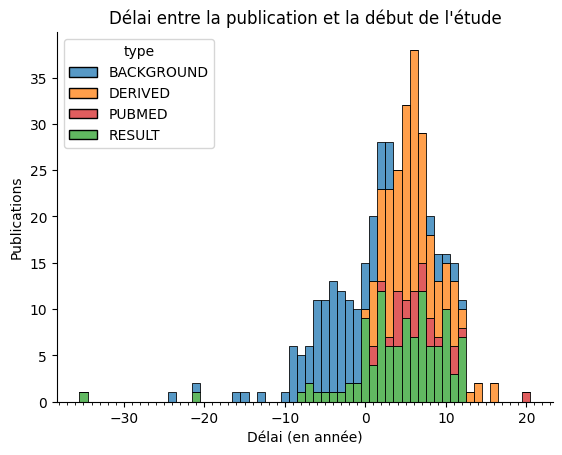

In [44]:
g = sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    # element="step",
    discrete=True,
    palette=palette,
)

# x axis ticks
g.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
g.set(
    title="Délai entre la publication et la début de l'étude",
    xlabel='Délai (en année)',
    ylabel='Publications',
)

# Remove spines
sns.despine()

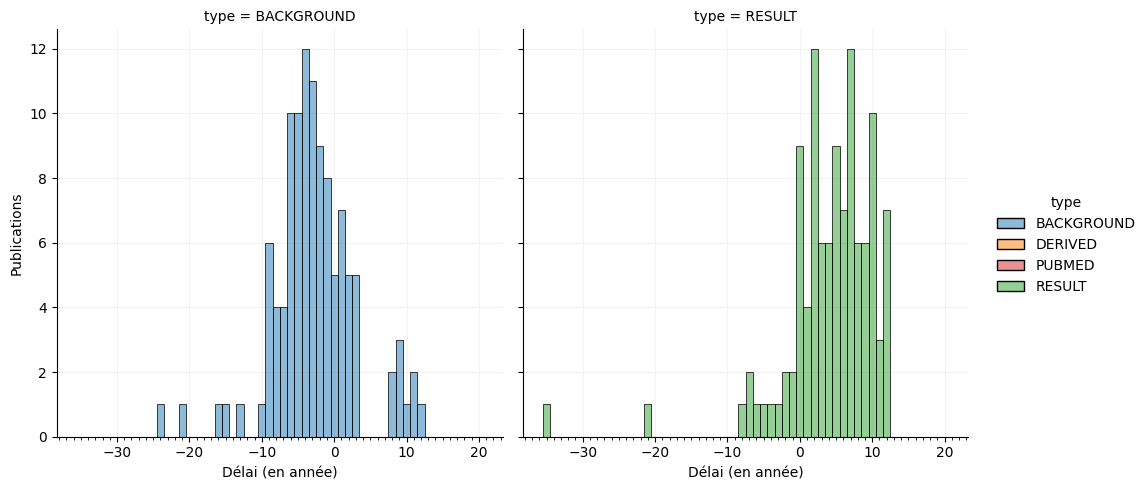

In [45]:
g = sns.displot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    col='type',
    col_order=['BACKGROUND', 'RESULT'],
    discrete=True,
    kind='hist',
    palette=palette,
)
# g.set_ylabels('Publications')

# Title
g.set(
    xlabel='Délai (en année)',
    ylabel='Publications',
)

for ax in g.axes[0]:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

**Les publications de type 'RESULT' avant la date de début de l'étude sont problématiques -> BACKGROUND**

**Le cluster de publications de type 'BACKGROUND' 10 ans après le début des études est suspect**  
S'agit-il de 'RESULT' ?

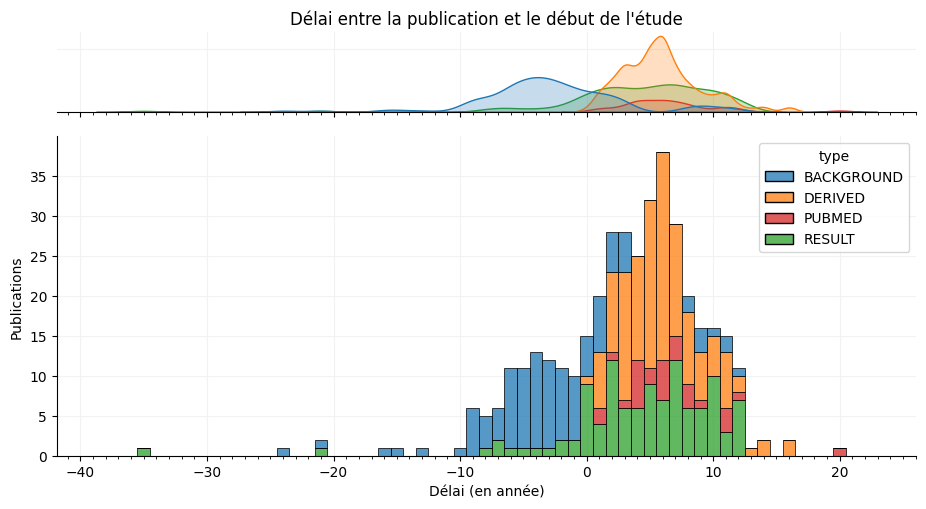

In [46]:
fig, axes = plt.subplots(2, 1, sharex=True, height_ratios=[1, 4])

sns.kdeplot(
    ax=axes[0],
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    fill=True,
    bw_adjust=0.5,
    legend=False,
    palette=palette,
)
sns.histplot(
    data=time_start_publication,
    x='TimeStartPublication',
    hue='type',
    multiple='stack',
    discrete=True,
    palette=palette,
)

# Figure size
fig.tight_layout()
fig.figure.set_figwidth(10)
fig.figure.set_figheight(5)

for ax in axes:
    # Grid
    ax.grid(color='0.95')
    ax.set_axisbelow(True)

    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))

# Title
axes[0].set(title="Délai entre la publication et le début de l'étude", ylabel='')
axes[1].set(
    xlabel='Délai (en année)',
    ylabel='Publications',
)

# Remove spines
sns.despine()
sns.despine(ax=axes[0], left=True)
axes[0].set(yticklabels=[])  # remove the tick labels
axes[0].tick_params(left=False)  # remove the ticks

**-> Passer toutes les publications de type 'RESULT' dont la date est antérieur à la date de début de l'étude en 'BACKGROUND'**

## Statistiques :

#### Nombre d'études cliniques:

In [47]:
num_trials = len(df_final.loc[:, 'NCTId'].unique())
num_trials

200

#### Nombre de publications :

In [48]:
num_publications = df_final.loc[:, 'pmid'].notna().sum()
num_publications

392

#### Nombre de publications par types :

In [49]:
df_final.loc[:, 'type'].value_counts()

type
DERIVED       142
BACKGROUND    111
RESULT        110
PUBMED         29
Name: count, dtype: int64

#### Nombre d'études sans publications :

In [50]:
num_trials_wo_pub = len(df_final.loc[df_final.loc[:, 'pmid'].isna(), 'NCTId'])
print("Nombre d'études sans publications :")
print(f"{num_trials_wo_pub} / {num_trials} ({num_trials_wo_pub / num_trials:.2%})")

Nombre d'études sans publications :
106 / 200 (53.00%)


#### Nombre d'études avec au moins une publication :

In [51]:
num_trials_with_pub = len(df_final.loc[df_final.loc[:, 'pmid'].notna(), 'NCTId'].unique())
print("Nombre d'études avec au moins une publication :")
print(f"{num_trials_with_pub} / {num_trials} ({num_trials_with_pub / num_trials:.2%})")

Nombre d'études avec au moins une publication :
94 / 200 (47.00%)


In [52]:
assert num_trials == (num_trials_wo_pub + num_trials_with_pub)

#### Nombre d'études avec au moins une publication de type 'RESULT' :

In [53]:
nctids = df_final.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_final.loc[:, 'NCTId'] == nctid
    if (df_final.loc[mask, 'type'] == 'RESULT').any():
        res.append(nctid)

In [54]:
print("Nombre d'études avec au moins une publication de type 'RESULT' :")
print(f"{len(res)} / {num_trials} ({len(res) / num_trials:.2%})")

Nombre d'études avec au moins une publication de type 'RESULT' :
13 / 200 (6.50%)


#### Nombre d'études avec au moins une publication autre que 'BACKGROUND' :

In [55]:
# TODO: move to function num_studies_other_than_bg()
nctids = df_final.loc[:, 'NCTId'].unique()

res = []
for nctid in nctids:
    mask = df_final.loc[:, 'NCTId'] == nctid
    if df_final.loc[mask, 'type'].isin(['DERIVED', 'RESULT', 'PUBMED']).any():
        res.append(nctid)

In [56]:
print("Nombre d'études avec au moins une publication autre que 'BACKGROUND' :")
print(f"{len(res)} / {num_trials} ({len(res) / num_trials:.2%})")

Nombre d'études avec au moins une publication autre que 'BACKGROUND' :
88 / 200 (44.00%)


#### Les publications de type 'RESULT' avant la date de début de l'étude sont problématique, on veut les passer en type 'SUSPICIOUS' :

In [57]:
time_start_publication

,NCTId,type,StartDate,year,TimeStartPublication
0,NCT02081066,NaN,2014-09-25,<NA>,<NA>
1,NCT05199831,NaN,2021-02-05,<NA>,<NA>
2,NCT01895920,NaN,2013-01-01,<NA>,<NA>
3,NCT02116374,NaN,2014-12-01,<NA>,<NA>
4,NCT02107365,NaN,2013-11-01,<NA>,<NA>
...,...,...,...,...,...
493,NCT02052271,NaN,2014-06-03,<NA>,<NA>
494,NCT00918307,DERIVED,2009-10-01,2021,12
495,NCT00918307,DERIVED,2009-10-01,2018,9
496,NCT01698411,NaN,2012-10-01,<NA>,<NA>


In [58]:
mask_result = (time_start_publication.loc[:, 'type'] == 'RESULT')
mask_time_neg = (time_start_publication.loc[:, 'TimeStartPublication'] < 0)

df_final.loc[mask_result & mask_time_neg, ['NCTId', 'pmid', 'type']].join(
    time_start_publication.loc[:, 'TimeStartPublication']
)

,NCTId,pmid,type,TimeStartPublication
124,NCT01490489,19602057,RESULT,-2
125,NCT01490489,16384869,RESULT,-5
126,NCT01490489,17531315,RESULT,-4
197,NCT01432821,12914551,RESULT,-8
198,NCT01432821,15037514,RESULT,-7
199,NCT01432821,15249613,RESULT,-7
200,NCT01432821,2271377,RESULT,-21
201,NCT01432821,15777732,RESULT,-6
248,NCT02488395,23916713,RESULT,-2
249,NCT02488395,6774653,RESULT,-35


In [59]:
len(df_final.loc[mask_result & mask_time_neg])

13

On change le type en 'SUSPICIOUS':

In [61]:
df_corrected = df_final.copy()
df_corrected['type'] = df_corrected['type'].cat.add_categories('SUSPICIOUS').astype('category')
# df_corrected

In [69]:
# change type to 'SUSPICIOUS'
df_corrected.loc[mask_result & mask_time_neg, 'type'] = 'SUSPICIOUS'

On vérifie que les publications concernées ont bien le nouveau 'type': 

In [71]:
df_corrected.loc[mask_result & mask_time_neg, ['NCTId', 'pmid', 'type']].join(
    time_start_publication.loc[:, 'TimeStartPublication']
)

,NCTId,pmid,type,TimeStartPublication
124,NCT01490489,19602057,SUSPICIOUS,-2
125,NCT01490489,16384869,SUSPICIOUS,-5
126,NCT01490489,17531315,SUSPICIOUS,-4
197,NCT01432821,12914551,SUSPICIOUS,-8
198,NCT01432821,15037514,SUSPICIOUS,-7
199,NCT01432821,15249613,SUSPICIOUS,-7
200,NCT01432821,2271377,SUSPICIOUS,-21
201,NCT01432821,15777732,SUSPICIOUS,-6
248,NCT02488395,23916713,SUSPICIOUS,-2
249,NCT02488395,6774653,SUSPICIOUS,-35


In [ ]:
# nctids = df_corrected.loc[:, 'NCTId'].unique()

# res = []
# for nctid in nctids:
#     mask = df_corrected.loc[:, 'NCTId'] == nctid
#     if df_corrected.loc[mask, 'type'].isin(['DERIVED', 'RESULT', 'PUBMED', 'SUSPICIOUS']).any():
#         res.append(nctid)

In [ ]:
# print("Nombre d'études avec au moins une publication autre que 'BACKGROUND' :")
# print(f"{len(res)} / {num_trials} ({len(res) / num_trials:.2%})")

#### Les publications de type 'BACKGROUND' après la date de fin de l'étude sont problématiques, on veut les passer en 'SUSPICIOUS' :

En limitant aux études dont la date de fin d'étude supérieure ou égale à 2013, on a éliminé les études avec des publications de type 'BACKGROUND' après la date de fin de l'étude.  
Cette partie est donc inutile et laissé pour info.

In [72]:
time_completion_publication

,NCTId,type,CompletionDate,year,TimeCompletionPublication
0,NCT02081066,NaN,2020-09-01,<NA>,<NA>
1,NCT05199831,NaN,2022-08-10,<NA>,<NA>
2,NCT01895920,NaN,2018-02-01,<NA>,<NA>
3,NCT02116374,NaN,2016-06-01,<NA>,<NA>
4,NCT02107365,NaN,2015-04-01,<NA>,<NA>
...,...,...,...,...,...
493,NCT02052271,NaN,2018-03-27,<NA>,<NA>
494,NCT00918307,DERIVED,2014-07-01,2021,7
495,NCT00918307,DERIVED,2014-07-01,2018,4
496,NCT01698411,NaN,2015-02-01,<NA>,<NA>


In [73]:
mask_background = (time_completion_publication.loc[:, 'type'] == 'BACKGROUND')
mask_time_pos = (time_completion_publication.loc[:, 'TimeCompletionPublication'] > 0)

df_final.loc[mask_background & mask_time_pos, ['NCTId', 'pmid', 'type']].join(
    time_completion_publication.loc[:, 'TimeCompletionPublication']
)

,NCTId,pmid,type,TimeCompletionPublication


In [74]:
len(df_final.loc[mask_background & mask_time_pos])

0

On change le type en 'SUSPICIOUS':

In [75]:
# change type to 'SUSPICIOUS'
df_corrected.loc[mask_background & mask_time_pos, 'type'] = 'SUSPICIOUS'

In [79]:
# nctids = df_corrected.loc[:, 'NCTId'].unique()

# res = []
# for nctid in nctids:
#     mask = df_corrected.loc[:, 'NCTId'] == nctid
#     if df_corrected.loc[mask, 'type'].isin(['DERIVED', 'RESULT', 'PUBMED', 'SUSPICIOUS']).any():
#         res.append(nctid)

In [80]:
# print("Nombre d'études avec au moins une publication autre que 'BACKGROUND' :")
# print(f"{len(res)} / {num_trials} ({len(res) / num_trials:.2%})")

Nombre d'études avec au moins une publication autre que 'BACKGROUND' :
88 / 200 (44.00%)


## Export en CSV:

In [87]:
# mask = df_final.loc[:, 'NCTId'].isin(res)
columns_to_export = ['NCTId', 'BriefTitle', 'HasResults', 'type', 'pmid', 'year']
df_final.loc[:, columns_to_export] 

,NCTId,BriefTitle,HasResults,type,pmid,year
0,NCT02081066,Identification of CETP as a Marker of Atherosc...,False,NaN,<NA>,<NA>
1,NCT05199831,Situational Analysis of HIV-related Disability...,False,NaN,<NA>,<NA>
2,NCT01895920,Viral Biofilms: Hijacking T Cell Extracellular...,False,NaN,<NA>,<NA>
3,NCT02116374,Physiopathology Study of the Microbiota Biodiv...,False,NaN,<NA>,<NA>
4,NCT02107365,"Therapy With Asunaprevir, Daclatasvir, Ribavir...",False,NaN,<NA>,<NA>
...,...,...,...,...,...,...
493,NCT02052271,Experimental Therapeutics in Essential Tremor ...,False,NaN,<NA>,<NA>
494,NCT00918307,Efficacy and Safety of Varenicline Among HIV-i...,False,DERIVED,34611902,2021
495,NCT00918307,Efficacy and Safety of Varenicline Among HIV-i...,False,DERIVED,29329763,2018
496,NCT01698411,Study of the Influence of Sleep on Hemodynamic...,False,NaN,<NA>,<NA>


In [88]:
df_final.loc[:, columns_to_export].to_csv(
    'Data/outputs/df_results.csv',
    columns = columns_to_export,
    sep=';',
    index=False,
    encoding='utf-8-sig',
)